In [3]:
# 大數據 (Big Data) 分析 - 資料視覺化 (Data Visualization)
# 模式 (pattern), 趨勢 (trend), 關聯性 (relation)-差異 (differ)
#資料視覺化的三個要素：1. 資料正確性; 2.閱讀者的需求; 3. 傳遞有效的資訊
#資料視覺化的進行方法： 1. 問問題 (分佈, 趨勢, 關聯, 排序); 2. 選擇或蒐集資料 (原始資料 raw data, 政府公開資料, 買來的, 網路爬蟲);
# 3. 找出模式 (學習課程); 4. 設定要呈現的優先順序; 5. 呈現報告結果.

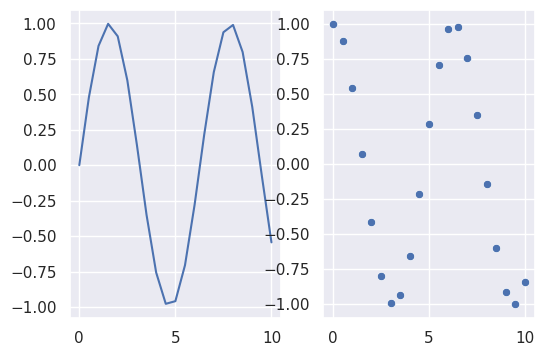

In [5]:
#seaborn
#pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
#3分鐘練習, 匯入套件 6:59

x = [0,0.5,1, 1.5, 2,2.5,3,3.5,4,4.5,5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10]
import math
sinus = [math.sin(v) for v in x]
cosinus = [math.cos(v) for v in x]
sns.set()
fig, axes = plt.subplots(1, 2, figsize= (6, 4))
ax1 = sns.lineplot(x=x, y=sinus, ax=axes[0])
ax2 = sns.scatterplot(x=x, y= cosinus, ax=axes[1])
plt.show()
#5分鐘練習,7:16

<Figure size 640x480 with 0 Axes>

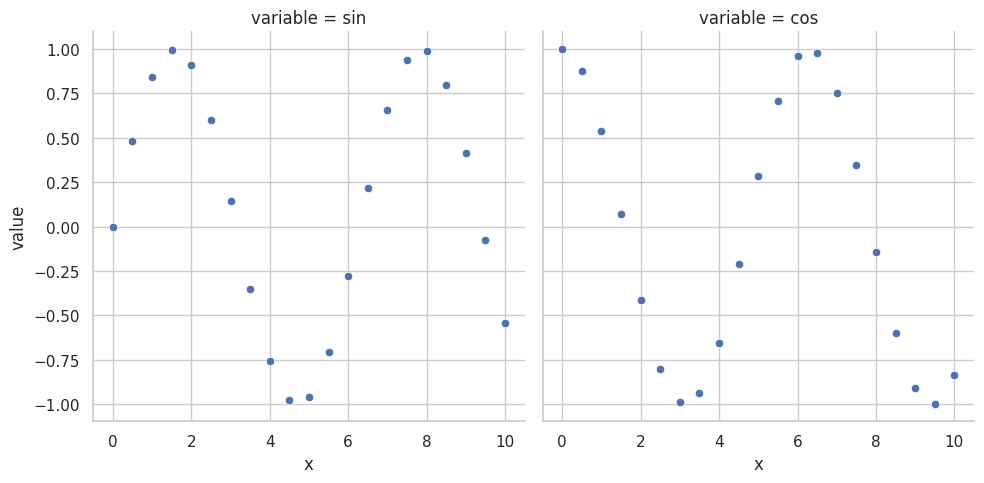

In [17]:
df = pd.DataFrame()
df['x'] = x
df['sin'] = sinus
df['cos'] = cosinus
#print(df.head())
#3分鐘完成, 7:24

df2 = pd.melt(df, id_vars=['x'], value_vars=['sin', 'cos'])
#print(df2)
sns.set()
sns.set_style('whitegrid') #樣式 1

sns.relplot(x='x', y='value', kind='scatter', col='variable', data=df2)
plt.show()
#5分鐘練習, 7:35
#第一節課休息至 7:50

In [21]:
# 給小費的習慣 tips
print(sns.get_dataset_names())

[]


In [23]:
# seaborn 目前提供的資料集已經被取消, 所以無法使用其中資料集

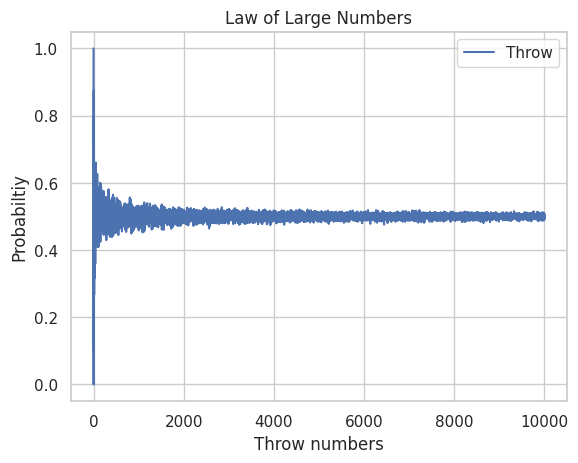

In [28]:
# 大數法則 (The Law of Large Numbers): 當數字夠大, 測試的資料, 就相當於實際的資料
import numpy as np
results = []
for num_throws in range(1, 10001):
  throws = np.random.randint(low=0, high=2, size=num_throws)
  probabiltiy_of_throws = throws.sum()/num_throws
  results.append(probabiltiy_of_throws)

df = pd.DataFrame({'Throw':results})
df.plot(color='b')
plt.title("Law of Large Numbers")
plt.xlabel('Throw numbers')
plt.ylabel('Probabiltiy')
plt.show()
#7 分鐘練習, 8:23

In [33]:
#綜合練習實際案例, 結合資料處理+資料視覺化
from sklearn.datasets import load_iris
iris = load_iris()

In [35]:
iris.keys()
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df['target'] = iris['target']
df.head()
#3分鐘練習, 8:38

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [36]:
#檢視資料的訊息, 查看是否有遺漏值
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


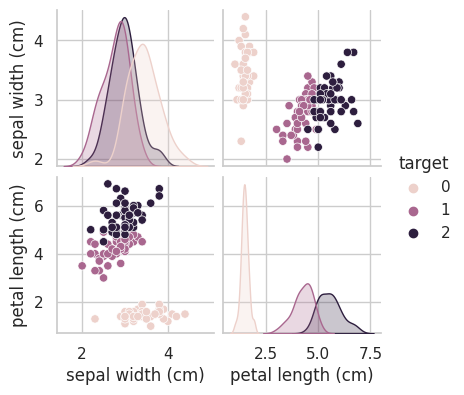

In [37]:
sns.pairplot(df, hue='target', vars=['sepal width (cm)', 'petal length (cm)'], size=2)
#第二節休息10分鐘, 至8:55

In [38]:
df.corr().round(2)['target']

sepal length (cm)    0.78
sepal width (cm)    -0.43
petal length (cm)    0.95
petal width (cm)     0.96
target               1.00
Name: target, dtype: float64

<Axes: xlabel='sepal width (cm)', ylabel='petal length (cm)'>

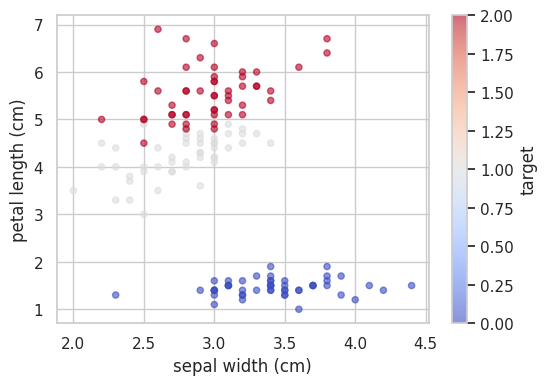

In [40]:
df.plot(kind='scatter', x='sepal width (cm)', y='petal length (cm)', c='target', cmap='coolwarm', alpha=0.6, figsize=(6,4))
#3分鐘練習, 9:06

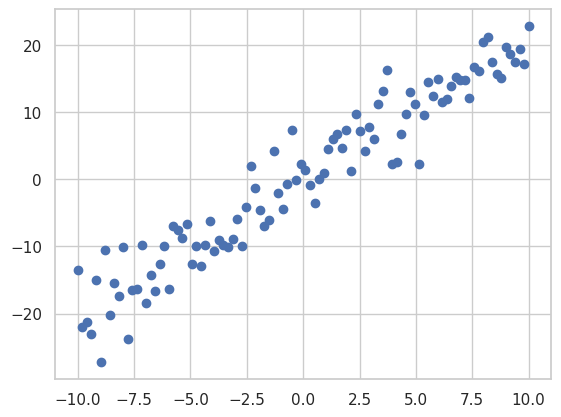

In [41]:
# 主成分分析 (PCA, princial component analysis)
np.random.seed(1)
x = np.linspace(-10, 10, 100)
y = 2 * x + 4*np.random.randn(100)
df_pca = pd.DataFrame(zip(x, y), columns=['x0', 'x1'])
plt.scatter(x, y)
#3分鐘完成圖形, 9:15

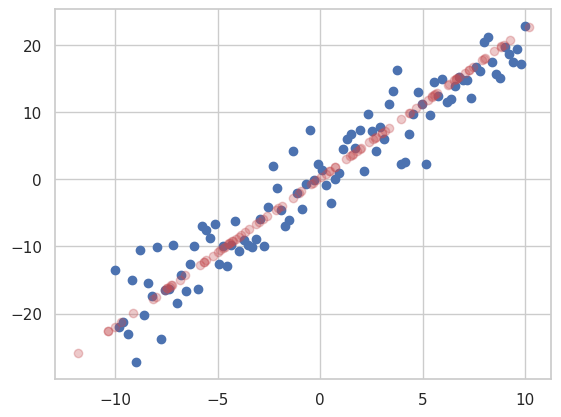

In [46]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
X_pca = pca.fit_transform(df_pca)
plt.scatter(x, y) #畫出原來資料的分佈散點圖
X_new = pca.inverse_transform(X_pca)
plt.scatter(X_new[:,0], X_new[:,1], c='r', alpha=0.3);
#3分鐘練習, 9:26


In [48]:
df = pd.read_csv('titanic.csv')
df.head(1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [51]:
#檢視資料的分佈
pd.concat([df['Survived'].value_counts(), df['Survived'].value_counts(normalize=True)], axis=1, keys=['個數', '百分比'])

,個數,百分比
0,549,0.616162
1,342,0.383838
